In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
# r2_score is used when multiple independent columns are used to create a model
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/Users/tawfeeq/Downloads/Amazon data.csv")
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
df.value_counts

<bound method DataFrame.value_counts of       product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Acc

In [5]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [6]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
mode = df["rating_count"].mode()[0]
df["rating_count"] = df["rating_count"].fillna(mode)

In [8]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [9]:
df_category = df['category'].str.split('|', expand=True)

# Step 2: Create mapping for known levels
category_mapping = {
    0: 'Main_Category',
    1: 'Department',
    2: 'Sub_Category_1',
    3: 'Sub_Category_2',
    4: 'Sub_Category_3',
    5: 'Sub_Category_4',
}

# Step 3: Rename the columns accordingly
df_category.rename(columns=category_mapping, inplace=True)

In [10]:
df = pd.concat([df,df_category], axis = 1)
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_content,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,6
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,"I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,"ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","2,219","3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4

In [11]:
df = df.rename(columns={6: "Sub_Category_5"})


In [12]:
df = df.drop(['img_link', 'product_link', 'review_content', 'user_name'],  axis = 1)

In [13]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'review_id', 'review_title',
       'Main_Category', 'Department', 'Sub_Category_1', 'Sub_Category_2',
       'Sub_Category_3', 'Sub_Category_4', 'Sub_Category_5'],
      dtype='object')

In [14]:
list1 = ["product_name","product_id","user_id","review_id","Main_Category","Department","Sub_Category_1","Sub_Category_2","Sub_Category_3","Sub_Category_4","Sub_Category_5"]

In [15]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'review_id', 'review_title',
       'Main_Category', 'Department', 'Sub_Category_1', 'Sub_Category_2',
       'Sub_Category_3', 'Sub_Category_4', 'Sub_Category_5'],
      dtype='object')

In [16]:
for i in list1:
    df[i] = df[i].astype("category")

In [17]:
import numpy as np
df["discount_percentage"] = (
        df["discount_percentage"]
        .astype(str)
        .str.replace(r'[%]', '', regex=True)
    )

df["discounted_price"] = (
        df["discounted_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                        
    )

df["actual_price"] = (
        df["actual_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                  
    )
df["rating_count"] = (
        df["actual_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                    
    )


df["rating"] = (
    df["rating"]
    .astype(str)
    .str.replace(r"[,|']", '', regex=True)   
    .replace('', np.nan)
)


In [18]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_id,review_title,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,1099,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4,349,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,1899,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,699,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,399,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59,4,919,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,NaN,NaN,NaN
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280,3045,25,4.1,3045,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,NaN,NaN,NaN
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219,3080,28,3.6,3080,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...",Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,NaN,NaN,NaN
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399,1890,26,4,1890,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","R39Q2Y

In [19]:
df["discounted_price"] = df["discounted_price"].astype("float")
df["actual_price"] = df["actual_price"].astype("float")
df["discount_percentage"] = df["discount_percentage"].astype("int")
df["rating_count"] = df["rating_count"].astype("float")

In [20]:
df["rating"] = df["rating"].astype("float")

In [21]:
categ = df.select_dtypes(exclude = 'number')
numerical = df.select_dtypes(include = 'number')

In [22]:
df.dtypes

product_id             category
product_name           category
category                 object
discounted_price        float64
actual_price            float64
discount_percentage       int64
rating                  float64
rating_count            float64
about_product            object
user_id                category
review_id              category
review_title             object
Main_Category          category
Department             category
Sub_Category_1         category
Sub_Category_2         category
Sub_Category_3         category
Sub_Category_4         category
Sub_Category_5         category
dtype: object

In [23]:
df.dtypes

product_id             category
product_name           category
category                 object
discounted_price        float64
actual_price            float64
discount_percentage       int64
rating                  float64
rating_count            float64
about_product            object
user_id                category
review_id              category
review_title             object
Main_Category          category
Department             category
Sub_Category_1         category
Sub_Category_2         category
Sub_Category_3         category
Sub_Category_4         category
Sub_Category_5         category
dtype: object

In [24]:
from sklearn.preprocessing import StandardScaler
def scaling_numeric():
    data_types = ["int32","float64"]
    new_df = df.select_dtypes(include = data_types)
    scaler_obj = StandardScaler()
    df_scaled = pd.DataFrame(scaler_obj.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

In [25]:
df_scaled = scaling_numeric()
df_scaled

,discounted_price,actual_price,rating,rating_count
0,-0.392731,-0.399774,0.354679,-0.399774
1,-0.421541,-0.468764,-0.331252,-0.468764
2,-0.421541,-0.326185,-0.674218,-0.326185
3,-0.402814,-0.436569,0.354679,-0.436569
4,-0.428024,-0.464165,0.354679,-0.464165
...,...,...,...,...
1460,-0.395612,-0.416332,-0.331252,-0.416332
1461,-0.121769,-0.220768,0.011713,-0.220768
1462,-0.130556,-0.217548,-1.703115,-0.217548
1463,-0.248679,-0.327013,-0.331252,-0.327013


In [26]:
from sklearn import preprocessing
label_obj = preprocessing.LabelEncoder()
for col in categ:
    categ[col] = label_obj.fit_transform(categ[col])

In [27]:
categ

,product_id,product_name,category,about_product,user_id,review_id,review_title,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,346,1158,10,474,623,817,881,1,1,7,12,50,14,7
1,848,134,10,279,88,1025,7,1,1,7,12,50,14,7
2,819,1023,10,1250,849,827,422,1,1,7,12,50,14,7
3,643,1264,10,1010,254,786,376,1,1,7,12,50,14,7
4,588,829,10,1189,17,114,44,1,1,7,12,50,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,673,696,192,902,1050,804,868,4,17,70,131,56,14,7
1461,201,850,172,76,425,779,1167,4,17,56,97,56,14,7
1462,27,164,138,520,865,288,1181,4,11,50,49,56,14,7
1463,61,462,129,395,300,749,212,4,11,21,35,56,14,7


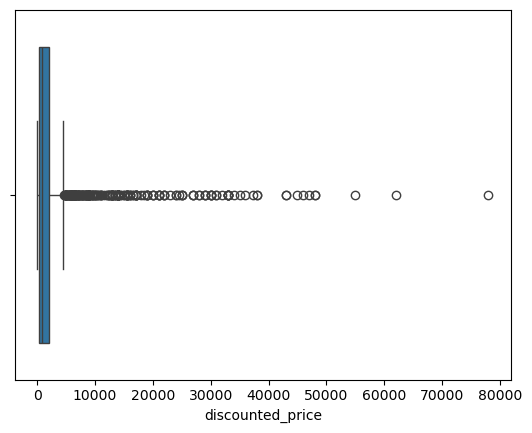

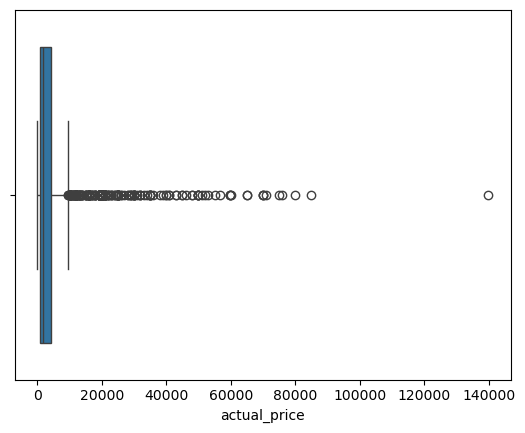

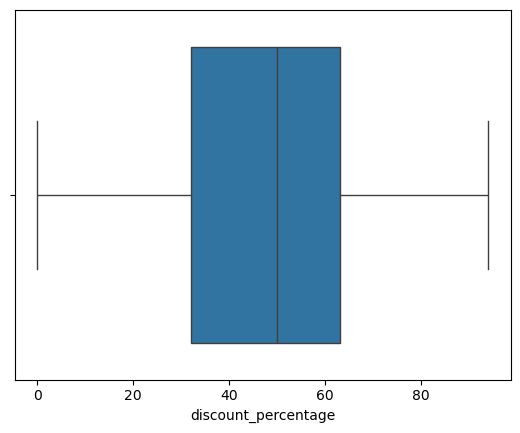

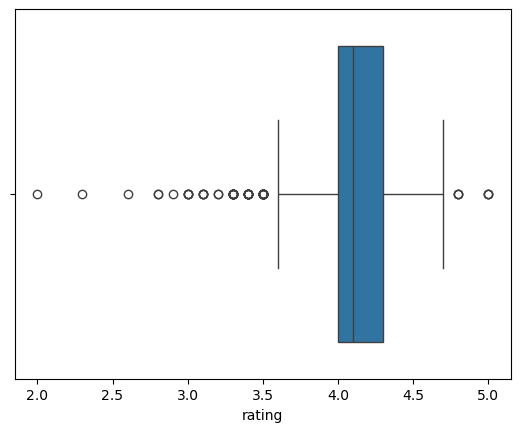

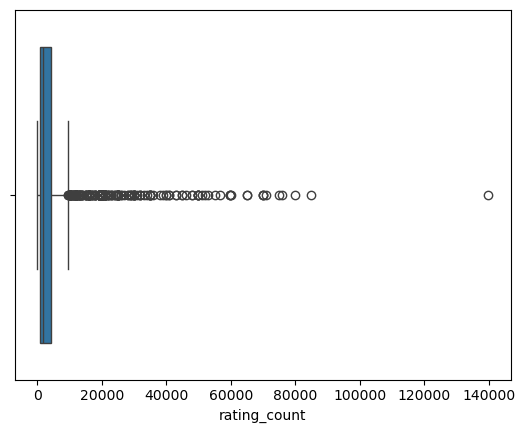

In [28]:
for col in numerical.columns:
    sns.boxplot(x = df[col])
    plt.show()

In [29]:
no_outlier = df_scaled.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

In [30]:
for col in df_scaled.columns:
    outlier_cleanup(col)

In [124]:
no_outlier

,discounted_price,actual_price,rating,rating_count
0,-0.392731,-0.399774,0.354679,-0.399774
1,-0.421541,-0.468764,-0.331252,-0.468764
2,-0.421541,-0.326185,-0.674218,-0.326185
3,-0.402814,-0.436569,0.354679,-0.436569
4,-0.428024,-0.464165,0.354679,-0.464165
...,...,...,...,...
1460,-0.395612,-0.416332,-0.331252,-0.416332
1461,-0.121769,-0.220768,0.011713,-0.220768
1462,-0.130556,-0.217548,-1.703115,-0.217548
1463,-0.248679,-0.327013,-0.331252,-0.327013


In [31]:
final_df = pd.concat([no_outlier,categ], axis = 1)
final_df

,discounted_price,actual_price,rating,rating_count,product_id,product_name,category,about_product,user_id,review_id,review_title,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,-0.392731,-0.399774,0.354679,-0.399774,346,1158,10,474,623,817,881,1,1,7,12,50,14,7
1,-0.421541,-0.468764,-0.331252,-0.468764,848,134,10,279,88,1025,7,1,1,7,12,50,14,7
2,-0.421541,-0.326185,-0.674218,-0.326185,819,1023,10,1250,849,827,422,1,1,7,12,50,14,7
3,-0.402814,-0.436569,0.354679,-0.436569,643,1264,10,1010,254,786,376,1,1,7,12,50,14,7
4,-0.428024,-0.464165,0.354679,-0.464165,588,829,10,1189,17,114,44,1,1,7,12,50,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,-0.395612,-0.416332,-0.331252,-0.416332,673,696,192,902,1050,804,868,4,17,70,131,56,14,7
1461,-0.121769,-0.220768,0.011713,-0.220768,201,850,172,76,425,779,1167,4,17,56,97,56,14,7
1462,-0.130556,-0.217548,-1.703115,-0.217548,27,164,138,520,865,288,1181,4,11,50,49,56,14,7
1463,-0.248679,-0.327013,-0.331252,-0.327013,61,462,129,395,300,749,212,4,11,21,35,56,14,7


In [31]:
final_df = pd.concat([no_outlier,categ], axis = 1)
final_df

,discounted_price,actual_price,rating,rating_count,product_id,product_name,category,about_product,user_id,review_id,review_title,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,-0.392731,-0.399774,0.354679,-0.399774,346,1158,10,474,623,817,881,1,1,7,12,50,14,7
1,-0.421541,-0.468764,-0.331252,-0.468764,848,134,10,279,88,1025,7,1,1,7,12,50,14,7
2,-0.421541,-0.326185,-0.674218,-0.326185,819,1023,10,1250,849,827,422,1,1,7,12,50,14,7
3,-0.402814,-0.436569,0.354679,-0.436569,643,1264,10,1010,254,786,376,1,1,7,12,50,14,7
4,-0.428024,-0.464165,0.354679,-0.464165,588,829,10,1189,17,114,44,1,1,7,12,50,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,-0.395612,-0.416332,-0.331252,-0.416332,673,696,192,902,1050,804,868,4,17,70,131,56,14,7
1461,-0.121769,-0.220768,0.011713,-0.220768,201,850,172,76,425,779,1167,4,17,56,97,56,14,7
1462,-0.130556,-0.217548,-1.703115,-0.217548,27,164,138,520,865,288,1181,4,11,50,49,56,14,7
1463,-0.248679,-0.327013,-0.331252,-0.327013,61,462,129,395,300,749,212,4,11,21,35,56,14,7


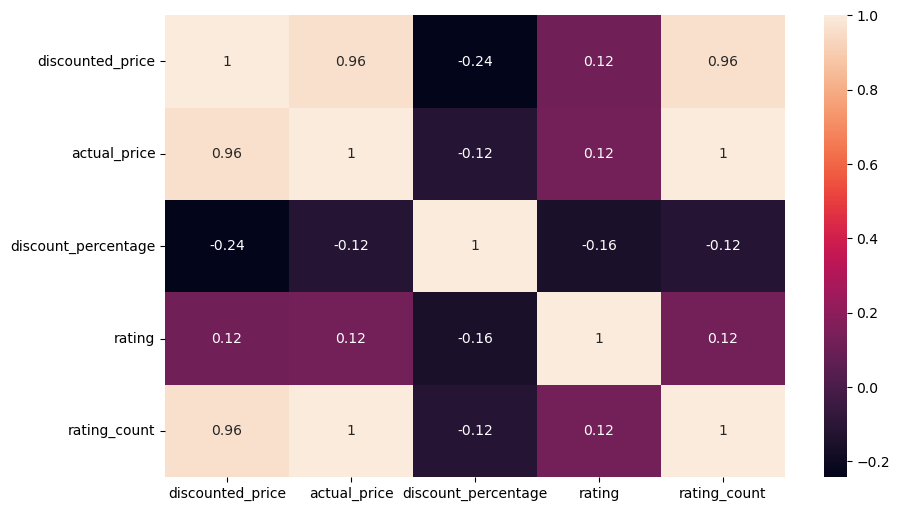

In [32]:
fig,ax =  plt.subplots(figsize=(10,6))
sns.heatmap(numerical.corr(),annot = True)
plt.show()

In [33]:
categ

,product_id,product_name,category,about_product,user_id,review_id,review_title,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,346,1158,10,474,623,817,881,1,1,7,12,50,14,7
1,848,134,10,279,88,1025,7,1,1,7,12,50,14,7
2,819,1023,10,1250,849,827,422,1,1,7,12,50,14,7
3,643,1264,10,1010,254,786,376,1,1,7,12,50,14,7
4,588,829,10,1189,17,114,44,1,1,7,12,50,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,673,696,192,902,1050,804,868,4,17,70,131,56,14,7
1461,201,850,172,76,425,779,1167,4,17,56,97,56,14,7
1462,27,164,138,520,865,288,1181,4,11,50,49,56,14,7
1463,61,462,129,395,300,749,212,4,11,21,35,56,14,7


In [34]:
final_df.columns

Index(['discounted_price', 'actual_price', 'rating', 'rating_count',
       'product_id', 'product_name', 'category', 'about_product', 'user_id',
       'review_id', 'review_title', 'Main_Category', 'Department',
       'Sub_Category_1', 'Sub_Category_2', 'Sub_Category_3', 'Sub_Category_4',
       'Sub_Category_5'],
      dtype='object')

In [35]:
y = np.array(final_df['Main_Category']).reshape(-1,1)
x = final_df[['Department', 'review_title', 'actual_price', 'Sub_Category_1', 'Sub_Category_2', 'Sub_Category_3']].to_numpy().reshape(-1,6)

In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)

In [37]:
from sklearn.linear_model import LogisticRegression
# Building the model
logreg = LogisticRegression()
# Training The Model
logreg.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
logreg.score(x_train,y_train)

0.7463414634146341

In [120]:
y_pred = logreg.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.740909090909091


In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[108  20   0   3   0   0   0]
 [ 18 104   0  29   0   1   0]
 [  0   0   0   0   0   1   0]
 [  6  30   0 114   0   0   0]
 [  1   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0]
 [  1   0   0   0   0   0   0]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.82      0.82       131
           2       0.66      0.68      0.67       152
           3       0.00      0.00      0.00         1
           4       0.78      0.76      0.77       150
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1

    accuracy                           0.74       440
   macro avg       0.32      0.32      0.32       440
weighted avg       0.73      0.74      0.74       440



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred,average = "weighted"))

0.7370568086484094


In [122]:
y_probas = logreg.predict_proba(x_test)

In [45]:
from sklearn.metrics import roc_curve

In [46]:
lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]

/var/folders/6p/5000n7hx4wb6xn2s7s0xh1tr0000gn/T/ipykernel_59510/3120731789.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', n_classes)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


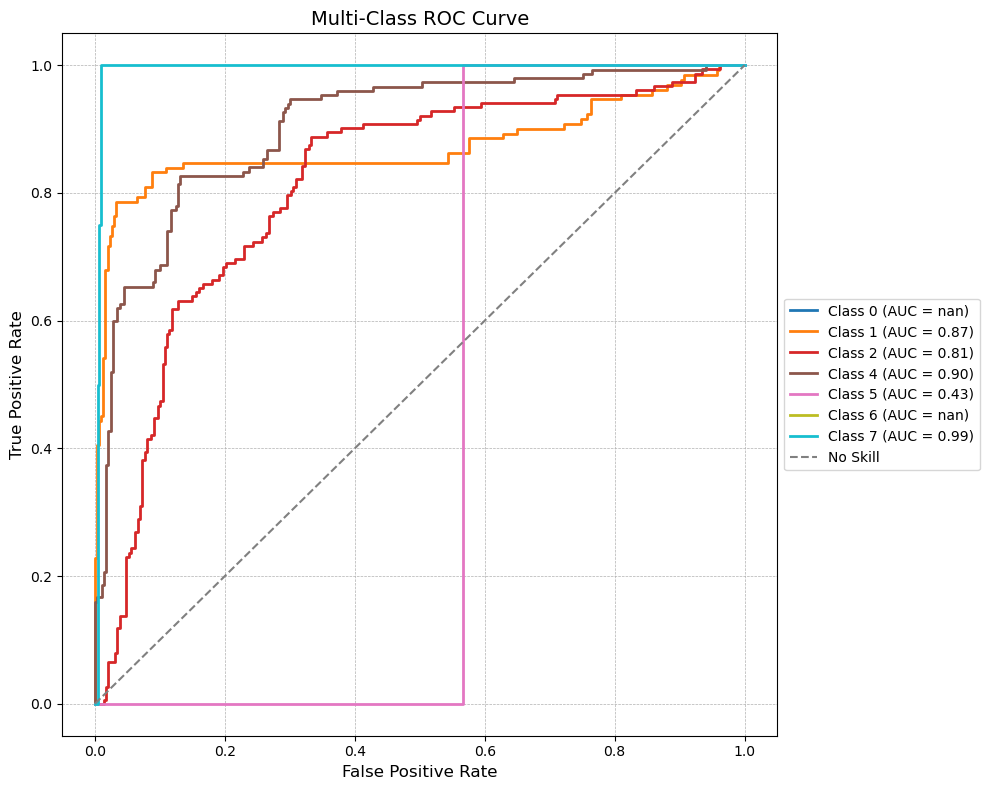

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.cm as cm

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=logreg.classes_)
n_classes = y_test_bin.shape[1]
y_probas = logreg.predict_proba(x_test)

# Set figure size
plt.figure(figsize=(10, 8))

# Use a colormap
colors = cm.get_cmap('tab10', n_classes)

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'Class {logreg.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot diagonal "No Skill" line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')

# Axis labels and title
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', linewidth=0.5)

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
final_df.columns

Index(['discounted_price', 'actual_price', 'rating', 'rating_count',
       'product_id', 'product_name', 'category', 'about_product', 'user_id',
       'review_id', 'review_title', 'Main_Category', 'Department',
       'Sub_Category_1', 'Sub_Category_2', 'Sub_Category_3', 'Sub_Category_4',
       'Sub_Category_5'],
      dtype='object')

In [49]:
x1 = final_df[['discounted_price', 'Sub_Category_1', 'Sub_Category_2', 'Department']].to_numpy().reshape(-1,4)
y1 = final_df["Main_Category"]

In [50]:
x1_tr,x1_te,y1_tr,y1_te = train_test_split(x1,y1,train_size = 0.8 ,random_state = 42)

In [51]:
n1 = int(round(len(x1_tr)**0.5,0))         
n1

34

In [52]:
from sklearn.neighbors import KNeighborsClassifier
acc = []
k_values = np.arange(10,34,4)
for myk2 in k_values:
    temp = KNeighborsClassifier(myk2)
    temp.fit(x1_tr,y1_tr)
    y_pr = temp.predict(x1_te)
    acc.append(accuracy_score(y1_te,y_pr))
print(acc)
print(k_values)     # number of neighbours

[0.9522184300341296, 0.9351535836177475, 0.9249146757679181, 0.9010238907849829, 0.8873720136518771, 0.8430034129692833]
[10 14 18 22 26 30]


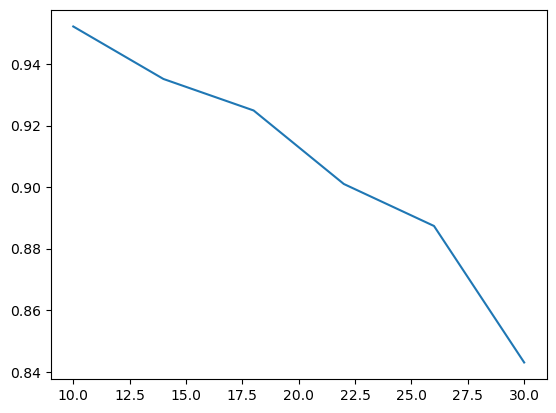

In [53]:
plt.plot(k_values, acc);

In [54]:
final_model = KNeighborsClassifier(3)

final_model.fit(x1_tr,y1_tr)
print(final_model.score(x1_tr,y1_tr)) # Training model performance
y_pred1 = final_model.predict(x1_te)
print(accuracy_score(y1_te,y_pr)) # Testing model performance

0.9812286689419796
0.8430034129692833


In [55]:
from sklearn.metrics import f1_score

f1 = f1_score(y1_te, y_pr, average = 'weighted')
f1

0.840634123014214

In [56]:
from sqlalchemy import create_engine
import pandas as pd
import pymysql

host = "localhost"
user = "root"
password = "tawfeeq02"
database = "amazondb"

mycon = pymysql.connect(host=host, user=user, password=password, database=database)

if mycon.open:
    print("Python and MySQL are connected")
else:
    print("Not connected")

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")


df2 = pd.read_csv("/Users/tawfeeq/Downloads/Amazon data.csv")

df2.to_sql("amazon_data", con=engine, index=False, if_exists="replace")

print("Data imported successfully")

Python and MySQL are connected
Data imported successfully


In [57]:
from sqlalchemy import create_engine
import pandas as pd
import pymysql

host = "localhost"
user = "root"
password = "tawfeeq02"
database = "amazondb"

mycon = pymysql.connect(host=host, user=user, password=password, database=database)

if mycon.open:
    print("Python and MySQL are connected")
else:
    print("Not connected")

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")


df2 = pd.read_csv("/Users/tawfeeq/Downloads/Amazon data.csv")

df2.to_sql("amazon_data", con=engine, index=False, if_exists="replace")

print("Data imported successfully")

Python and MySQL are connected
Data imported successfully


In [58]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')